# Fake News Detection

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

### Loading The Dataset

In [2]:
fake = pd.read_csv('C:/Users/xpert/Documents/Data_Science_Project/Project1/Fake.csv/Fake.csv', delimiter = ',')
true = pd.read_csv('C:/Users/xpert/Documents/Data_Science_Project/Project1/True.csv/True.csv', delimiter = ',')

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
## combining these two dataset to one dataset
fake['temp']= 0
true['temp']= 1
datas = pd.DataFrame()
datas = true.append(fake)

C:\Users\xpert\AppData\Local\Temp\ipykernel_4404\3891959749.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas = true.append(fake)


### Observing the sample of dataset

In [6]:
datas.sample(12)

,title,text,subject,date,temp
12809,THREE SHOCKING REASONS WHY Hillary Clinton Is ...,EXTREME POSITIONS ON ABORTIONHillary Clinton ...,politics,"Oct 7, 2016",0
54,Trump commutes fraud sentence of kosher meatpa...,"WASHINGTON (Reuters) - President Donald Trump,...",politicsNews,"December 21, 2017",1
3206,Defense chief say he has power to set Afghan t...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,"June 14, 2017",1
303,Trump Is So Bad Hillary Is Telling Him How To...,President Donald Trump has had some strong wor...,News,"September 27, 2017",0
16683,U.N. says Sri Lanka's delay in post-war reconc...,COLOMBO (Reuters) - Long delays in Sri Lanka s...,worldnews,"October 23, 2017",1
16288,PRESIDENT-ELECT TRUMP’S INAUGURAL COMMITTEE An...,"Today, the Presidential Inaugural Committee (P...",Government News,"Dec 21, 2016",0
16725,STAND UP AND CHEER! UKIP Party Leader SLAMS Ge...,He s been Europe s version of the outspoken Te...,Government News,"Mar 8, 2016",0
5461,Trump national security aide Flynn resigns ove...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"February 13, 2017",1
18462,Kremlin tells supporters of detained critic Na...,MOSCOW (Reuters) - The Kremlin on Tuesday warn...,worldnews,"October 3, 2017",1
8873,Weird: Ted Cruz Fantasizes About Spanking Hil...,Ted Cruz again showed that his campaign is wei...,News,"January 8, 2016",0


### data shape 

In [7]:
print(datas.shape)

(44898, 5)


In [8]:
#Here columns 'date' and 'topic' are less important for prediction 
#so dropping these columns.
column = ['date','subject']
datas = datas.drop(columns=column)

In [9]:
print(datas.shape)

(44898, 3)


#### Cheking the dataset after dropping

In [10]:
datas.sample(8)

,title,text,temp
18347,PERFECT! President Trump Is Laughing Hysterica...,"Last week, after President Trump retweeted a h...",0
5920,Iraqi MPs want parliament to discuss U.S. trav...,BAGHDAD (Reuters) - Iraqi lawmakers have reque...,1
16646,OBAMA’S ECONOMIC LEGACY IN 9 Easy To Read Charts,Anyone who would look at these charts and stil...,0
17583,'Time is running out:' Germany urges UK to mov...,BERLIN (Reuters) - It is up to Britain to move...,1
19546,France's National Front on verge of split afte...,PARIS (Reuters) - Four months after a heavy el...,1
20157,Pakistan kicks out medical charity MSF from co...,"PESHAWAR/ISLAMABAD, Pakistan (Reuters) - Pakis...",1
4995,U.S. Agriculture secretary nominee submits eth...,(Reuters) - U.S. President Donald Trump’s nomi...,1
18650,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",0


### Exploring the data

In [11]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   temp    44898 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


#### Created array of 'title' column as input_array for preprocessing

In [12]:
input_array=np.array(datas['title'])

### Natural Language Processing

In [13]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xpert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Using nltk and importing Stopwords(For dealing with stopwords) and PortStemmer(For stemming)

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

for i in range(0, 40000):
    newArr = re.sub('[^a-zA-Z]', ' ', input_array[i])
    newArr = newArr.lower()
    newArr = newArr.split()
    ps = PorterStemmer()
    newArr = [ps.stem(word) for word in newArr if not word in set(stopwords.words('english'))]
    newArr = ' '.join(newArr)
    corpus.append(newArr)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
countv = CountVectorizer(max_features = 5000)

X = countv.fit_transform(corpus).toarray()
y = datas.iloc[0:40000, 2].values

## Modelling

#### Splitting the dataset into the Training set and Test set in 80-20 ratio

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Fitting Logistic Regression to the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)

## Model Evaluation

#### Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
print(cm)

[[3488  264]
 [ 140 4108]]


#### Getting more details

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      3752
           1       0.94      0.97      0.95      4248

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000



#### Getting Accuracy

In [22]:
from sklearn.metrics import accuracy_score
print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))

Accuarcy: 94.95


#### Confusion matrix in a well plotted chart

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

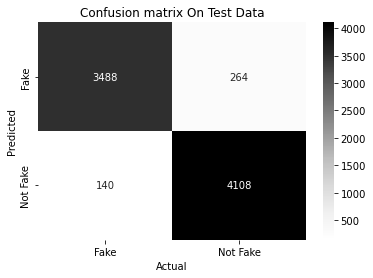

In [24]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [1]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
     ---------------------------------------- 7.2/7.2 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 1.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ---------------------------------------- 55.4/55.4 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 2.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
